In [2]:
# Cell 1: 加载处理好的数据
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import os

# 1. 自动定位文件路径
filename = 'processed_data.csv'
file_path_1 = os.path.join('..', 'data', filename)
file_path_2 = os.path.join('data', filename)

if os.path.exists(file_path_1):
    df = pd.read_csv(file_path_1)
elif os.path.exists(file_path_2):
    df = pd.read_csv(file_path_2)
else:
    print("❌ 找不到 processed_data.csv！请确保你运行了上一个 Notebook 并保存了文件。")
    df = None

if df is not None:
    # 处理缺失值 (以防清洗过程中产生了空字符串)
    df = df.dropna(subset=['cleaned_text', 'labels']) # 确保这里的列名和你上一步保存的一致
    
    print(f"✅ 准备就绪！数据量: {len(df)}")
    print(df.head(2))

✅ 准备就绪！数据量: 219286
   Unnamed: 0                                             tweets   labels  \
0           0  ChatGPT: Optimizing Language Models for Dialog...  neutral   
1           1  Try talking with ChatGPT, our new AI system wh...     good   

                                        cleaned_text  
0    chatgpt optimizing language models for dialogue  
1  try talking with chatgpt our new ai system whi...  



📊 数据划分完成: 训练集 175428 条, 测试集 43858 条
⏳ 正在将文本转化为向量 (TF-IDF)...
🧠 开始训练逻辑回归模型...

🏆 Baseline 模型准确率 (Accuracy): 0.8338

📝 详细报告 (Classification Report):
              precision    recall  f1-score   support

         bad       0.87      0.94      0.91     21504
        good       0.83      0.80      0.81     11279
     neutral       0.74      0.65      0.69     11075

    accuracy                           0.83     43858
   macro avg       0.82      0.80      0.81     43858
weighted avg       0.83      0.83      0.83     43858



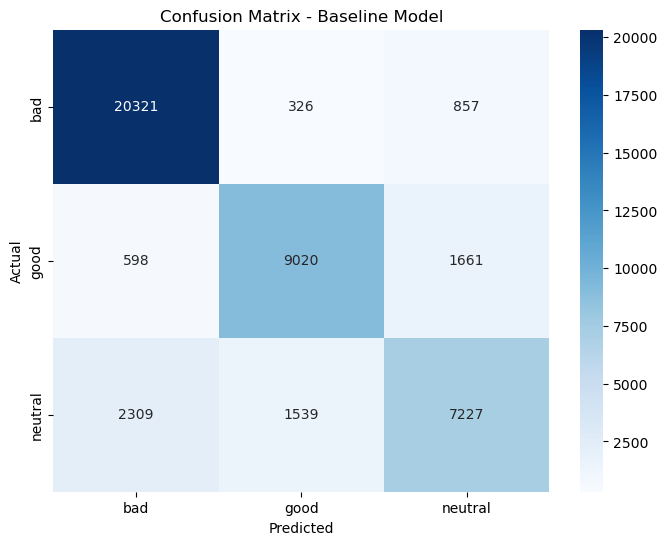

In [ ]:
# Cell 2: 训练 Baseline 模型 (TF-IDF + Logistic Regression)

if df is not None:
    # 1. 划分训练集和测试集 (80% 训练, 20% 考试)
    X = df['cleaned_text']
    y = df['labels']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    print(f"\n📊 数据划分完成: 训练集 {len(X_train)} 条, 测试集 {len(X_test)} 条")

    # 2. 文本向量化 (把文字变成数学向量: TF-IDF)
    print("⏳ 正在将文本转化为向量 (TF-IDF)...")
    vectorizer = TfidfVectorizer(max_features=5000) # 只取出现频率最高的5000个词
    X_train_vec = vectorizer.fit_transform(X_train)
    X_test_vec = vectorizer.transform(X_test)
    
    # 3. 训练逻辑回归模型 (最基础的分类器)
    print("🧠 开始训练逻辑回归模型...")
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train_vec, y_train)
    
    # 4. 预测与评估
    y_pred = model.predict(X_test_vec)
    
    # 5. 输出成绩单
    acc = accuracy_score(y_test, y_pred)
    print(f"\n🏆 Baseline 模型准确率 (Accuracy): {acc:.4f}")
    print("\n📝 详细报告 (Classification Report):")
    print(classification_report(y_test, y_pred))
    
    # 6. 画混淆矩阵 (看看具体把哪一类搞混了)
    plt.figure(figsize=(8, 6))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
    plt.title('Confusion Matrix - Baseline Model')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()